# First decision tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.paths import DATA_RAW_DIR
from pathlib import Path

In [2]:
path_titanic = str(DATA_RAW_DIR / "titanic.csv")
print(Path(path_titanic).exists())

True


In [3]:
df_titanic = pd.read_csv(path_titanic, sep=",", encoding="utf-8")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Exploratory Data Analysis

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
df_titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
df_titanic.duplicated().sum()

np.int64(0)

### Delete some columns

In [7]:
columns_to_drop = ['Name', 'Fare']
df_titanic.drop(columns=columns_to_drop, inplace=True, axis='columns')

### rename columns

In [8]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard'],
      dtype='object')

In [9]:
current_columns = df_titanic.columns
current_columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard'],
      dtype='object')

In [10]:
new_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','ParCh']

In [11]:
df_titanic.columns = new_columns
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh'], dtype='object')

In [12]:
df_titanic.shape

(887, 6)

In [13]:
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
ParCh         int64
dtype: object

In [14]:
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 1, 'female': 0})
df_titanic['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
882    1
883    0
884    0
885    1
886    1
Name: Sex, Length: 887, dtype: int64

In [15]:
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
ParCh         int64
dtype: object

# Decision Tree Training with Sci-kit Learn

In [16]:
# separate features and target variables

X = df_titanic.drop(columns=['Survived'])
y = df_titanic['Survived']

In [17]:
# Import libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# create model

model_dt = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [19]:
# Train the model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

# Model Evaluation

In [20]:
# predictions

y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)

In [21]:
# Metrics
from sklearn.metrics import accuracy_score

# Model Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8048387096774193
Test Accuracy: 0.7640449438202247


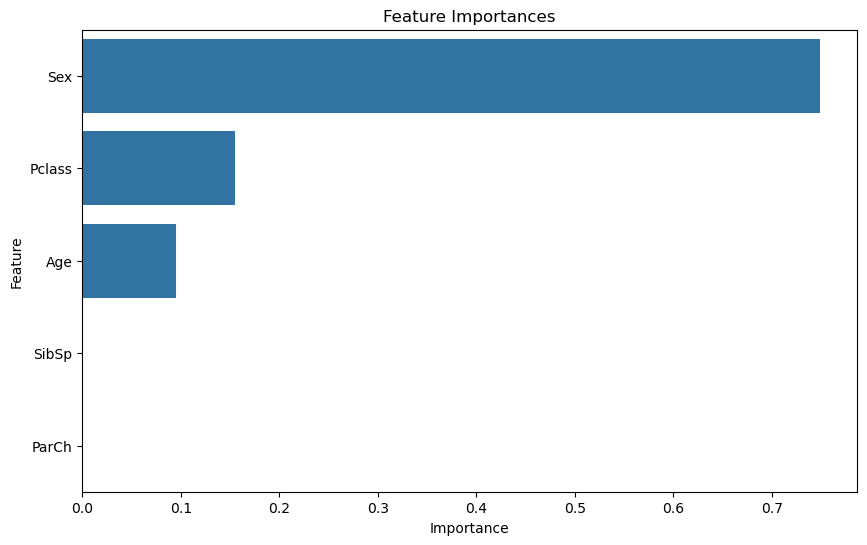

In [22]:
import seaborn as sns

importances = model_dt.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
importances

array([0.15540921, 0.74889744, 0.09569334, 0.        , 0.        ])

In [24]:
feature_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'ParCh'], dtype='object')

In [25]:
feature_importances

,Feature,Importance
1,Sex,0.748897
0,Pclass,0.155409
2,Age,0.095693
3,SibSp,0.000000
4,ParCh,0.000000
